### 필요한 라이브러리 다운로드

In [1]:
!pip install -qU openai langchain langchain-upstage langchain-chroma getpass4

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Upstage API Key 입력

In [2]:
# @title set API key
import os
import getpass
import warnings

warnings.filterwarnings("ignore")

# Get the Upstage API key using getpass
if "UPSTAGE_API_KEY" not in os.environ or not os.environ["UPSTAGE_API_KEY"]:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your Upstage API key: ")

print("API key has been set successfully.")

Enter your Upstage API key: ··········
API key has been set successfully.


# csv -> Vector
## 문단 리스트 준비

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
import pandas as pd
from typing import List

In [4]:
#측정값 8000개 넘는 항목만 리스트화
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('/content/filter_obervation.csv')

# 빈 딕셔너리 생성
description_counts = {}

# 각 row를 돌면서 세기
for desc in df['DESCRIPTION']:
    if desc in description_counts:
        description_counts[desc] += 1
    else:
        description_counts[desc] = 1

# 등장 수 기준으로 정렬 (내림차순)
sorted_counts = sorted(description_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
for description, count in sorted_counts:
    print(f"{description} : {count}번")


Diastolic Blood Pressure : 17939번
Systolic Blood Pressure : 17939번
Body Weight : 16838번
Heart rate : 16300번
Respiratory rate : 16300번
Body mass index (BMI) [Ratio] : 14999번
Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD) : 13682번
Glucose [Mass/volume] in Blood : 10844번
Urea nitrogen [Mass/volume] in Blood : 10844번
Creatinine [Mass/volume] in Blood : 10844번
Calcium [Mass/volume] in Blood : 10844번
Sodium [Moles/volume] in Blood : 10844번
Potassium [Moles/volume] in Blood : 10844번
Chloride [Moles/volume] in Blood : 10844번
Carbon dioxide  total [Moles/volume] in Blood : 10844번
Weight difference [Mass difference] --pre dialysis - post dialysis : 10515번
Hemoglobin A1c/Hemoglobin.total in Blood : 10099번
Ketones [Presence] in Urine by Test strip : 8893번
Specific gravity of Urine by Test strip : 8893번
pH of Urine by Test strip : 8893번
Nitrite [Presence] in Urine by Test strip : 8893번
Hemoglobin [Presence] in Urine by Test st

In [5]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('/content/filter_obervation.csv')

# DESCRIPTION별 개수 세기
description_counts = df['DESCRIPTION'].value_counts()

# 8000번 이상 등장한 DESCRIPTION만 필터링
descriptions_over_8000 = description_counts[description_counts > 8000].index.tolist()

# 결과 출력
print(f"8000개 넘는 DESCRIPTION 수: {len(descriptions_over_8000)}개")
print("DESCRIPTION 리스트:")
for desc in descriptions_over_8000:
    print(f"{desc} ({description_counts[desc]}개)")


8000개 넘는 DESCRIPTION 수: 42개
DESCRIPTION 리스트:
Diastolic Blood Pressure (17939개)
Systolic Blood Pressure (17939개)
Body Weight (16838개)
Heart rate (16300개)
Respiratory rate (16300개)
Body mass index (BMI) [Ratio] (14999개)
Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD) (13682개)
Chloride [Moles/volume] in Blood (10844개)
Urea nitrogen [Mass/volume] in Blood (10844개)
Creatinine [Mass/volume] in Blood (10844개)
Sodium [Moles/volume] in Blood (10844개)
Potassium [Moles/volume] in Blood (10844개)
Calcium [Mass/volume] in Blood (10844개)
Glucose [Mass/volume] in Blood (10844개)
Carbon dioxide  total [Moles/volume] in Blood (10844개)
Weight difference [Mass difference] --pre dialysis - post dialysis (10515개)
Hemoglobin A1c/Hemoglobin.total in Blood (10099개)
Leukocyte esterase [Presence] in Urine by Test strip (8893개)
Nitrite [Presence] in Urine by Test strip (8893개)
pH of Urine by Test strip (8893개)
Specific gravity of Urine by Test

In [6]:
# 새 csv 파일 만들기

# CSV 파일 경로를 지정합니다.
file_path = '/content/filter_obervation.csv'


# CSV 파일을 읽어들입니다.
df = pd.read_csv(file_path)

# 기록값이 8000개 이상인 항목만 남김.
vital_signs_df = df[df['DESCRIPTION'].isin(descriptions_over_8000)]

# 필요한 컬럼만 남깁니다.
vital_signs_df = vital_signs_df[['DATE', 'PATIENT', 'ENCOUNTER', 'DESCRIPTION', 'VALUE', 'UNITS']]

# DESCRIPTION별로 열을 생성합니다.
pivot_df = vital_signs_df.pivot_table(
    index=['DATE', 'PATIENT', 'ENCOUNTER'],
    columns=['DESCRIPTION', 'UNITS'],
    values='VALUE',
    aggfunc='first'  # 여러 값이 있으면 첫 번째 값만 선택
)

# 피벗 후 컬럼 이름을 평탄화합니다.
pivot_df.columns = [f'{desc} [{unit}]' for desc, unit in pivot_df.columns]

# 피벗된 데이터를 새 CSV 파일로 저장합니다.
output_file_path = 'test_observation_over_8000.csv'  # 저장할 파일 경로
pivot_df.to_csv(output_file_path)

print(f"새로운 CSV 파일이 '{output_file_path}'에 저장되었습니다.")


새로운 CSV 파일이 'test_observation_over_8000.csv'에 저장되었습니다.


In [18]:
# #새로운 observation 사례화

import pandas as pd
from langchain.docstore.document import Document

# CSV 파일 읽기
df = pd.read_csv("test_observation_over_8000.csv")

# 사용할 항목 필터 리스트 (15개)
filtered_descriptions = [
    "Diastolic Blood Pressure",
    "Systolic Blood Pressure",
    "Body Weight",
    "Heart rate",
    "Body mass index (BMI) [Ratio]",
    "Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD)",
    "Urea nitrogen [Mass/volume] in Blood",
    "Creatinine [Mass/volume] in Blood",
    "Sodium [Moles/volume] in Blood",
    "Potassium [Moles/volume] in Blood",
    "Calcium [Mass/volume] in Blood",
    "Glucose [Mass/volume] in Blood",
    "Carbon dioxide  total [Moles/volume] in Blood",
    "Hemoglobin A1c/Hemoglobin.total in Blood",
    "Protein [Mass/volume] in Urine by Test strip"
]

# 행을 텍스트로 변환하는 함수
def row_to_text(row) -> str:
    text = f"환자ID: {row['PATIENT'][:8]} 환자는, {row['DATE'][:10]}에 다음과 같은 데이터를 기록했습니다: "

    for description in filtered_descriptions:
        # description이 포함된 실제 컬럼 찾기
        matching_columns = [col for col in row.index if description == col.split(' [')[0]]
        if matching_columns:
            full_col_name = matching_columns[0]
            value = row[full_col_name]
            if pd.notna(value):
                # 정수로 표현 가능하면 정수로 출력
                if isinstance(value, (int, float)) and float(value).is_integer():
                    value_str = str(int(value))
                else:
                    value_str = str(value)
                text += f"{description}: {value_str}, "

    return text

# 각 행을 텍스트로 변환하여 리스트에 저장
texts = df.apply(row_to_text, axis=1).tolist()

# 문서 리스트 생성 (LangChain용 Document 객체)
observation_docs = []
for _, row in df.iterrows():
    text = row_to_text(row)
    observation_docs.append(Document(
        page_content=text,
        metadata={
            "patient_id": row["PATIENT"][:8],
            "table": "observations"
        }
    ))

# 예시 10개 출력
for i, doc in enumerate(observation_docs[:10], 1):
    print(f"[예시 {i}]")
    print(doc.page_content)
    print()


[예시 1]
환자ID: c1ebfd06 환자는, 1918-11-27에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 75 Systolic Blood Pressure: 137 Body Weight: 4.2 Heart rate: 77 

[예시 2]
환자ID: c1ebfd06 환자는, 1919-01-01에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 80 Systolic Blood Pressure: 139 Body Weight: 5 Heart rate: 81 

[예시 3]
환자ID: c1ebfd06 환자는, 1919-03-05에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 77 Systolic Blood Pressure: 143 Body Weight: 6.5 Heart rate: 71 

[예시 4]
환자ID: c1ebfd06 환자는, 1919-05-07에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 77 Systolic Blood Pressure: 140 Body Weight: 7.7 Heart rate: 83 

[예시 5]
환자ID: c1ebfd06 환자는, 1919-08-06에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 84 Systolic Blood Pressure: 150 Body Weight: 9.1 Heart rate: 78 

[예시 6]
환자ID: c1ebfd06 환자는, 1919-11-05에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 76 Systolic Blood Pressure: 138 Body Weight: 10.3 Heart rate: 65 

[예시 7]
환자ID: c1ebfd06 환자는, 1919-12-31에 다음과 같은 데이터를 기록했습니다: Diastolic Blood Pressure: 79 Systoli

In [19]:
# csv 파일로 저장 가능!
import pandas as pd

# 리스트를 딕셔너리로 변환
doc_data = [{"patient_id": doc.metadata["patient_id"], "content": doc.page_content} for doc in observation_docs]

# 데이터프레임으로 변환 후 저장
doc_df = pd.DataFrame(doc_data)
doc_df.to_csv("observation_documents.csv", index=False, encoding="utf-8-sig")

## Chunking 작업

In [20]:
# Splitter 설정_observation
observation_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=0,
)

# 실제 split
observation_splits = observation_text_splitter.split_documents(observation_docs)

# 결과 출력
print("Splits:", len(observation_splits))

Splits: 34461


## Plot 시각화

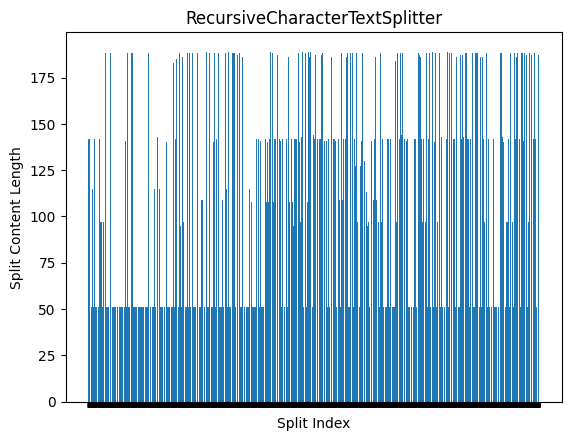

In [21]:
# 시각화_observation
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in observation_splits]
# split_lengths = [len(split.page_content) for split in splits2]
# split_lengths = [len(split.page_content) for split in splits3]

plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

## Vector DB 저장

In [ ]:
#observation

# 임포트
from langchain_chroma import Chroma
from langchain_upstage import UpstageEmbeddings
from langchain.docstore.document import Document

# 1️⃣ Embeddings 객체 선언
embeddings = UpstageEmbeddings(model="embedding-query")

# observation_splits가 Document 객체로 변환되었는지 확인
if isinstance(observation_splits[0], Document):
    print("observation_splits는 Document 객체입니다.")
else:
    # observation_splits가 문서 형태가 아니라면 Document로 변환
    observation_docs = [Document(page_content=text) for text in observation_splits]

# 2️⃣ Chroma 벡터 DB 생성 및 문서 삽입
observation_vectorstore = Chroma.from_documents(
    documents=observation_docs,  # observation_docs가 Document 객체 리스트여야 함
    embedding=embeddings,
    persist_directory="./observation_chroma_db"
)

observation_splits는 Document 객체입니다.


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


# LLM 생성

In [ ]:
# ✅ Dense Retriever 생성
observation_retriever = observation_vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 1},
)

# ✅ 사용자의 한국어 질문 예시
query = "임의의 한 환자의 바이탈 정보를 알려줘"

# ✅ 검색된 문서 가져오기
observation_docs = observation_retriever.invoke(query)

# all_context = "\n".join([
#     doc.page_content for doc in (patient_docs + diagnosis_docs + medication_docs)
# ])
all_context = "\n".join([
    doc.page_content for doc in (observation_docs)
])

# ✅ 한국어 system 프롬프트 정의
from langchain_upstage import ChatUpstage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatUpstage()

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            당신은 환자 정보에 대한 질문에 친절히 답변하는 한국어 의료 AI 어시스턴트입니다.
            아래 CONTEXT 정보를 참고하여 환자 정보를 자연스럽게 한국어로 풀어서 설명해 주세요.
            각 컬럼명(예: body weight, heart rate 등)은 한국어로 번역해 사용하고, 대화체 톤으로 작성해 주세요.
            표나 리스트 형태보다는 문단 형태로 정리해 주세요.
            모르면 모른다고 솔직히 답변하세요.
            ---
            CONTEXT:
            {context}
            """,
        ),
        ("human", "{input}"),
    ]
)

# ✅ LLM chain 구성
chain = prompt | llm | StrOutputParser()

# ✅ 최종 chain 호출
response = chain.invoke({"context": all_context, "input": query})

print("\n💬 AI의 답변:")
print(response)



💬 AI의 답변:
물론이죠! 해당 환자는 1993년 5월 20일 오전 6시 31분 7초에 바이탈 신호를 측정했어요. 측정 유형은 고유 코드 116c6afe-6768-f695-9993-700208ea18ab를 사용했습니다. 이 환자가 기록한 바이탈 정보에는 체중, 심박수, 체온, 혈압이 포함되어 있어요. 체중은 65.2kg, 심박수는 분당 72회로 안정적이었고, 체온은 36.8도로 정상 범위 내에 있었어요. 혈압은 수축기 혈압이 120mmHg, 이완기 혈압이 80mmHg로 측정되어, 정상 혈압 수준을 유지하고 있었습니다. 이 데이터는 그 순간 환자의 건강 상태를 보여주는 중요한 지표가 됩니다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

TMI: 여기까지 돌리는 데 Billing 0.05$ 사용
### Now What?
GPT 추천:
# ✅ 💡 선택지 크게 두 가지

## 🅰️ **전부 조인 후 넣기 (One big chunk)**

### ✔️ 장점

* 환자 한 명에 대한 정보가 하나의 청크에 모두 담김 → 질문할 때 정확한 컨텍스트 제공
* 질병, 약물, 투약 주의사항 등을 한 번에 설명하기 쉬움

### ❌ 단점

* row 폭발 (조인한 경우 레코드 수 \* 약물 수 \* 진단 수 …)
* 청크가 너무 커짐 → 나눠야 할 때 문맥이 깨짐
* 관리/업데이트 어려움

---

## 🅱️ **테이블별로 분리, Retriever에서 동적 컨텍스트 결합 (멀티-벡터 전략)**

### ✔️ 장점

* 각 테이블 정보 독립적으로 유지
* 스케일 확장 유리 (예: 약물 DB 업데이트, 질환 DB 변경 등)
* Retriever 단계에서 동적으로 "다중 소스" 컨텍스트 결합 가능

### ❌ 단점

* QA 정확도를 높이려면 "적절한 컨텍스트 조합 로직" 필요
* LLM 프롬프트 설계가 복잡

---

# ✅ 💡 현업과 연구에서 많이 쓰는 전략: **멀티-벡터 & 멀티-Retriever 방식**

### 💡 구조

```
[벡터 DB A] ← 환자 정보 테이블 (예: Patient Demographics)
[벡터 DB B] ← 질병 정보 테이블 (예: Diagnoses)
[벡터 DB C] ← 약물 정보 테이블 (예: Medications)
```

---

## ✅ 1️⃣ 각 테이블별로 개별 벡터 DB 구축

* 각 테이블 row 단위로 Document 생성 → 독립 embedding
* 예:

```python
patient_docs = [Document(page_content="환자 A: 60세, 남성, 당뇨, 고혈압", metadata={"patient_id": "A"})]
diagnosis_docs = [Document(page_content="환자 A: 진단명: 당뇨병, HbA1c: 8.5%", metadata={"patient_id": "A"})]
medication_docs = [Document(page_content="환자 A: 메트포르민 투약 중", metadata={"patient_id": "A"})]
```

---

## ✅ 2️⃣ Retriever 여러 개 선언

```python
patient_retriever = patient_vectorstore.as_retriever(search_kwargs={'k': 1})
diagnosis_retriever = diagnosis_vectorstore.as_retriever(search_kwargs={'k': 1})
medication_retriever = medication_vectorstore.as_retriever(search_kwargs={'k': 1})
```

---

## ✅ 3️⃣ 질문 시, **각 Retriever에서 병렬 검색 → 결과 컨텍스트 합침**

```python
patient_docs = patient_retriever.invoke(query)
diagnosis_docs = diagnosis_retriever.invoke(query)
medication_docs = medication_retriever.invoke(query)

all_context = "\n".join([
    doc.page_content for doc in (patient_docs + diagnosis_docs + medication_docs)
])
```

---

## ✅ 4️⃣ LLM에 합쳐진 context 전달

```python
response = chain.invoke({"context": all_context, "input": query})
```

---

# ✅ 💬 **실제 사용 시 포인트**

| 고려 사항         | 내용                                                                      |
| ------------- | ----------------------------------------------------------------------- |
| ✅ 컨텍스트 길이     | 여러 테이블 합치면 길어질 수 있음 → 필요하면 각 테이블에서 `k` 값을 줄이거나 요약 추가                    |
| ✅ metadata 활용 | `patient_id`, `diagnosis_id` 등으로 cross-link → 필터 기반 검색 강화 가능            |
| ✅ 프롬프트 설계     | "아래에 환자 기본정보, 질병정보, 약물정보가 있습니다. 이 환자에게 적합한 약물과 투약 시 주의사항을 종합적으로 알려주세요." |

---

# ✅ ✅ 💡 **요약**

### 💡 다 조인? ❌

* 데이터 폭발, 관리 불가

### 💡 테이블별 분리 & Retriever에서 조합? ✅

* 유연, scalable, 관리 쉽고, 정확도 높음

---

In [ ]:
import shutil
from google.colab import files

# 1. 폴더 압축
shutil.make_archive('/content/procedure_chroma_db', 'zip', '/content/my_folder')

# 2. 다운로드
files.download('/content/my_folder_zip.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>